# LAB 3 - Information Security

Members:
* Andrea Andreozzi - 2163406
* Riccardo Scalco - 2155352
* Sergio Cibecchini - 2155353
* Luca Ferrari - 2166294

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import random

## Task 1

We declare $M$ and $K$ ad the length of $u$ and $k$ respectively. We find at random $u$ and $k$ and then we compute $t$.

In [2]:
M = 50
K = 30

In [3]:
u = ''.join(random.choice(['0', '1']) for _ in range(M))
k = ''.join(random.choice(['0', '1']) for _ in range(K))

print(f"u: {u}")
print(f"k: {k}")

u: 10111011111011111110100110110111000101000010001100
k: 010001010011111001000011001101


In [4]:
def sum_digits(num):
    return sum(int(digit) for digit in str(num))

In [5]:
# t = T(k;u)
def generate_tag(u, k):
    int_u = int(u, 2)
    int_k = int(k, 2)

    somma_u = sum_digits(int_u)
    somma_k = sum_digits(int_k)

    t = somma_u * somma_k
    t = bin(t)[2:]
    return t

In [6]:
# x = append (u,t)
def sign_message(u, k):
    t = generate_tag(u, k)
    x = str(u) + str(t)
    return x

In [ ]:
def verify_tag(x, k):
    u_received = x[:M]
    t_received = x[M:]
    t = generate_tag(u_received, k)
    b = t_received != t
    return u_received, int(b)

In [8]:
x = sign_message(u, k)
print(f"x: {x}")
u_received, b = verify_tag(x, k)
print(f"u_received: {u_received}")
print(f"b: {b} (0 -> correct, 1 -> incorrect)")

x: 10111011111011111110100110110111000101000010001100101101000110
u_received: 10111011111011111110100110110111000101000010001100
b: 0 (0 -> correct, 1 -> incorrect)


PLOT 1: fixed $K=5000$ bits, variable length of $M$.

In [9]:
def computational_evaluation(u, k, num_iterations):
    total_send_time = 0
    total_received_time = 0
    for _ in range(num_iterations):
        start_time = time.time()
        x = sign_message(u, k)
        end_time = time.time()
        total_send_time += end_time - start_time
        start_time = time.time()
        u_received, b = verify_tag(x, k)
        end_time = time.time()
        total_received_time += end_time - start_time

    return total_send_time / num_iterations, total_received_time / num_iterations

In [10]:
def plot_computational_evaluation(send_times, received_times, format_string):
    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    message_sizes = list(send_times.keys())
    send_avg_times = list(send_times.values())
    received_avg_times = list(received_times.values())

    # Send times plot
    ax1.plot(message_sizes, send_avg_times, '-o', label='Send Time', color='tab:blue')
    ax1.set_title(f'Average Send Time vs {format_string} Size')
    ax1.set_xlabel(f'{format_string} Size (bits)')
    ax1.set_ylabel('Average Time (seconds)')
    ax1.grid(True)
    ax1.legend()

    # Received times plot
    ax2.plot(message_sizes, received_avg_times, '-o', label='Verify Time', color='tab:green')
    ax2.set_title(f'Average Verification Time vs {format_string} Size')
    ax2.set_xlabel(f'{format_string} Size (bits)')
    ax2.set_ylabel('Average Time (seconds)')
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [11]:
num_iterations = 100

K = 5000
k = ''.join(random.choice(['0', '1']) for _ in range(K))
send_times = {}
received_times = {}
for M in range(100, 10001, 100):
    u = ''.join(random.choice(['0', '1']) for _ in range(M))
    send_time, received_time = computational_evaluation(u, k, num_iterations)
    send_times[M] = send_time
    received_times[M] = received_time
#plot_computational_evaluation(send_times, received_times, "Message")

M = 5000
u = ''.join(random.choice(['0', '1']) for _ in range(M))
send_times = {}
received_times = {}
for K in range(100, 10001, 100):
    k = ''.join(random.choice(['0', '1']) for _ in range(K))
    send_time, received_time = computational_evaluation(u, k, num_iterations)
    send_times[K] = send_time
    received_times[K] = received_time
#plot_computational_evaluation(send_times, received_times, "Key")

## TASK 2

In [12]:
M = 50
K = 30

new_u = ''.join(random.choice(['0', '1']) for _ in range(M))

u = ''.join(random.choice(['0', '1']) for _ in range(M))
k = ''.join(random.choice(['0', '1']) for _ in range(K))

x = sign_message(u,k)

print(f"u: {u}")
print(f"k: {k}")

u: 01101110100000101011001011000000100000000100010110
k: 101110011111001011000101101000


In [13]:
def substitution_attack(x, new_u):
    u_received = x[:M]
    t_received = x[M:]

    u = int(u_received, 2)
    t = int(t_received, 2)

    sum_u = sum_digits(u)

    coeff = int(t / sum_u)

    sum_new_u = sum_digits(int(new_u, 2))
    new_tag = coeff * sum_new_u
    new_tag = bin(new_tag)[2:]
    x_new  = str(new_u) + str(new_tag)
    return x_new

In [14]:
new_x = substitution_attack(x, new_u)
print(f"new_x: {new_x}")
u_received, b = verify_tag(new_x, k)
print(f"u_received: {u_received}")
print(f"b: {b} (0 -> correct, 1 -> incorrect)")

new_x: 00101100000111101111011111011100000111000000110100110011001100
u_received: 00101100000111101111011111011100000111000000110100
b: 0 (0 -> correct, 1 -> incorrect)


## TASK 3

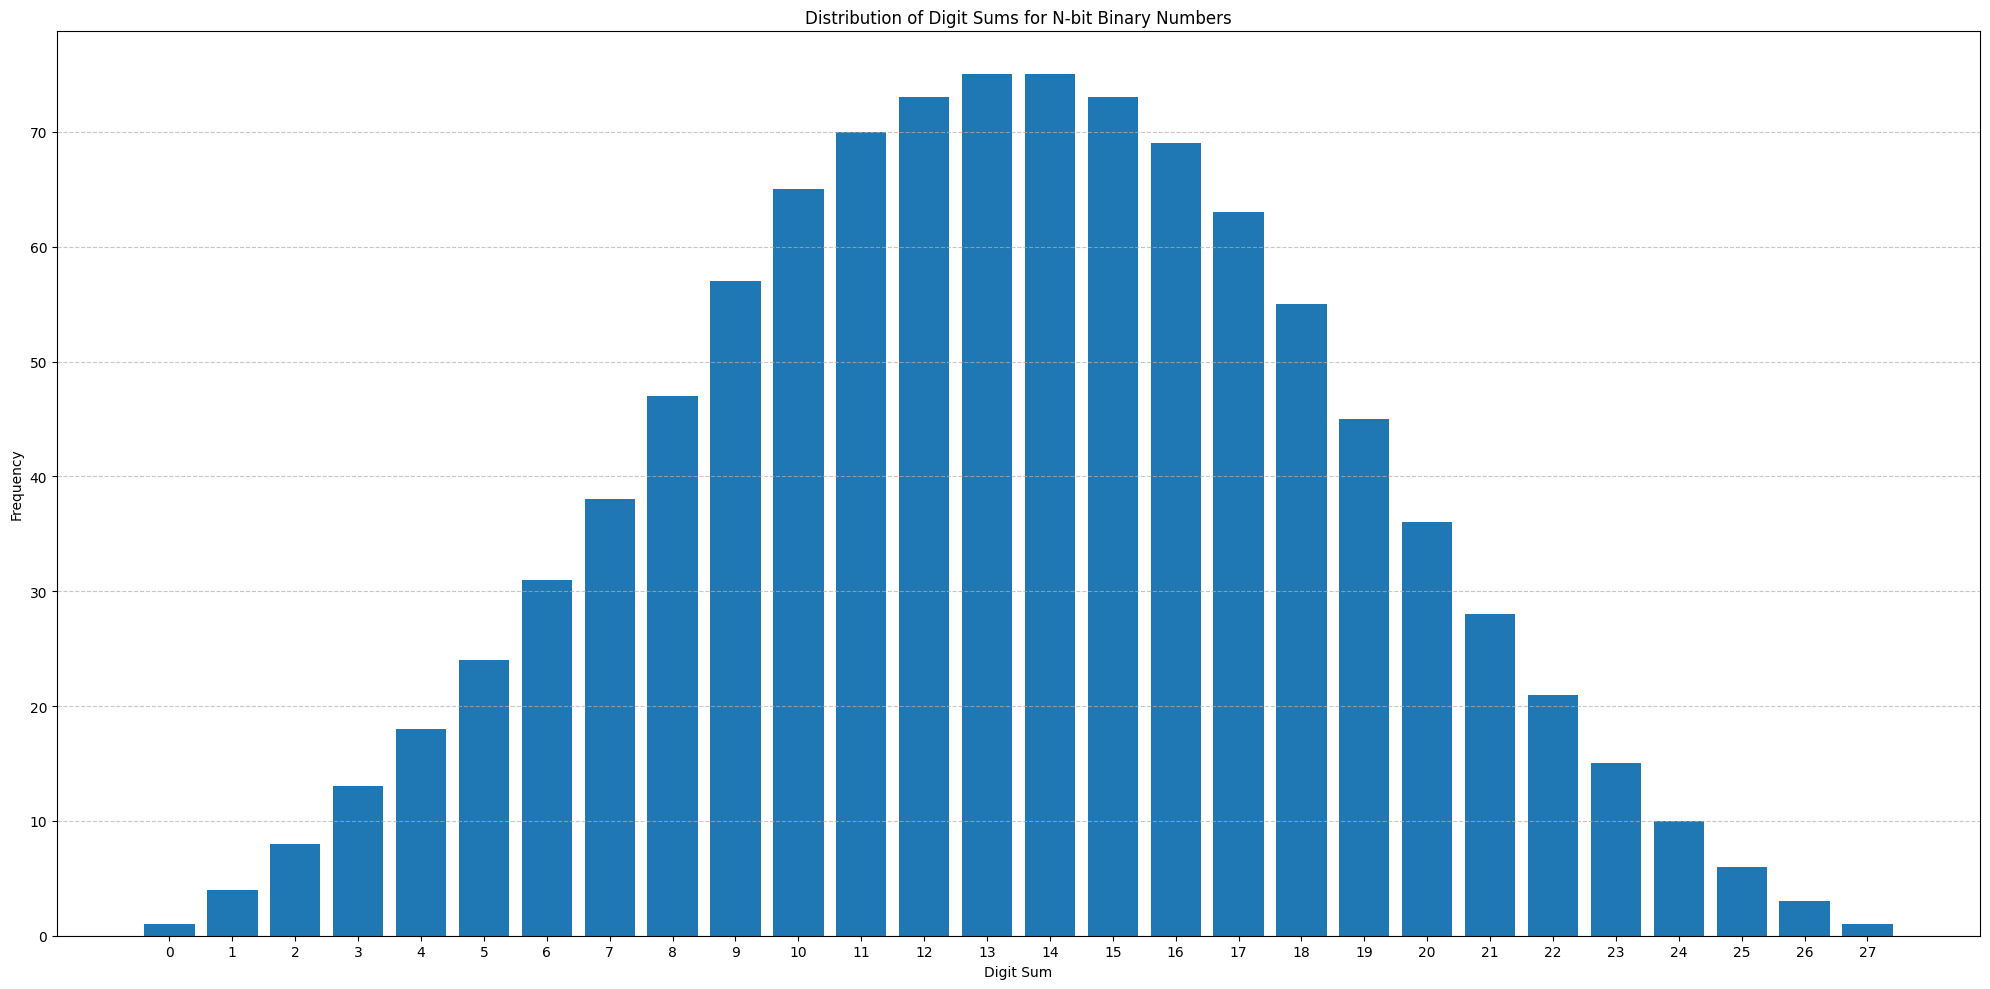

In [33]:
from collections import Counter

def compute_digit_sums(N):
    if N < 0:
        raise ValueError("N must be non-negative")

    max_val = 2 ** N
    digit_sums = []
    for i in range(max_val):
        base10_digits = str(i)
        digit_sum = sum(int(d) for d in base10_digits)
        digit_sums.append(digit_sum)
    return digit_sums

def plot_distribution(digit_sums):
    counts = Counter(digit_sums)
    x = sorted(counts.keys())
    y = [counts[val] for val in x]

    plt.figure(figsize=(20,10))
    plt.bar(x, y)
    plt.xlabel("Digit Sum")
    plt.ylabel("Frequency")
    plt.title("Distribution of Digit Sums for N-bit Binary Numbers")
    plt.xticks(x)  # Ensure all x-axis labels are shown
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# Example usage
if __name__ == "__main__":
    N = 10  # change as needed
    digit_sums = compute_digit_sums(N)
    plot_distribution(digit_sums)


In [76]:
M = 50
K = 10
k = ''.join(random.choice(['0', '1']) for _ in range(K))
u = ''.join(random.choice(['0', '1']) for _ in range(M))

print(f"u:{u}")
print(f"k:{k} - k_decimal:{int(k,2)} - k_decimal_sum: {sum_digits(int(k,2))}")
print(f"Correct tag: {generate_tag(u,k)}")

u:10110111110110010001010001111010011101010110010011
k:0010100010 - k_decimal:162 - k_decimal_sum: 9
Correct tag: 1001010010


In [77]:
def find_maximum(K):
    n = 2 ** K
    n = str(n)
    digits = [int(d) for d in n]
    for i in range(len(digits) - 1 , 0, -1):
        digits[i] = 9
    digits[i-1] -= 1
    
    digits = [str(d) for d in digits]
    digits = ''.join(digits)    
    return int(digits)

In [80]:
def forging_attack(u_forged, K):
    max_value = sum_digits(find_maximum(K))
    prob_value = int(max_value / 2)
    u_sum = sum_digits(int(u_forged, 2))
    print(f"u_sum: {u_sum}")
    for i in range(prob_value + 1):
        send_forged_message(u_forged, u_sum, prob_value + i)
        send_forged_message(u_forged, u_sum, prob_value - i)


def send_forged_message(u_forged, u_sum, key_value):
    t_forged = u_sum * (key_value) 
    new_tag = bin(t_forged)[2:]
    print(new_tag)
    x_new  = str(u_forged) + str(new_tag)
    u_received, b = verify_tag(x_new, k)
    print(key_value)
    if b == 0:
        print(f"u_forged: {u_forged}")
        print(f"x_new: {x_new}")
        print(f"b: {b} (0 -> correct, 1 -> incorrect)")
        return True
    return False

In [81]:
forging_attack(u, K)

u_sum: 66
1101011010
13
1101011010
13
1110011100
14
1100011000
12
1111011110
15
1011010110
11
10000100000
16
1010010100
10
10001100010
17
1001010010
9
u_forged: 10110111110110010001010001111010011101010110010011
x_new: 101101111101100100010100011110100111010101100100111001010010
b: 0 (0 -> correct, 1 -> incorrect)
10010100100
18
1000010000
8
10011100110
19
111001110
7
10100101000
20
110001100
6
10101101010
21
101001010
5
10110101100
22
100001000
4
10111101110
23
11000110
3
11000110000
24
10000100
2
11001110010
25
1000010
1
11010110100
26
0
0
